# 데이터 불러오기

In [ ]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/income_predict/data/"

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트 데이터

train.shape, test.shape

((20000, 23), (10000, 22))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 연속형 변수 추출
train_int = train[train.describe().columns]
# 이산형 변수 추출, 연속형 변수가 아닌 부분을 train.columns.difference를 통해서 출력해주는 것이다.
train_str = train[train.columns.difference(train.describe().columns)]

In [ ]:
train_str.columns

Index(['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary', 'ID',
       'Income_Status', 'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status'],
      dtype='object')

In [ ]:
col = ['Net_Profit', 'Total_Amount','Dividend_Yield','Gains_Ratio', 'Net_Gain','Profit_Margin','Losses_Ratio', 'Net_Profit_per_Gain', 'Net_Profit_per_Loss','Net_Earnings_per_Working_Year']

In [ ]:
train.drop(columns = col,inplace = True)

train.shape

(20000, 23)

In [ ]:
test.drop(columns = col,inplace = True)

test.shape

(10000, 22)

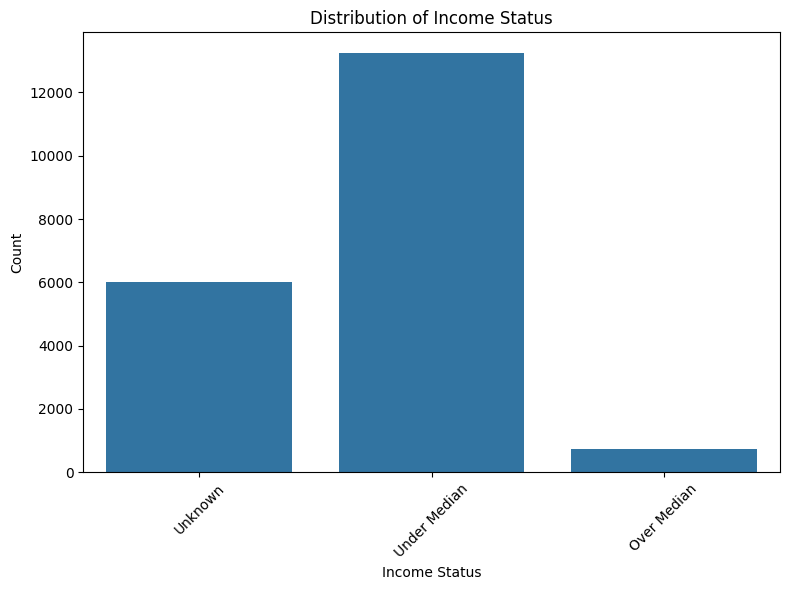

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame containing the 'Income_Status' column
# Replace 'train' with your actual DataFrame name if different

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Income_Status')
plt.title('Distribution of Income Status')
plt.xlabel('Income Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# feature engineering

In [ ]:
# Net Profit

train['Net_Profit'] = train['Gains'] - train['Losses'] + train['Dividends']
test['Net_Profit'] = test['Gains'] - test['Losses'] + test['Dividends']

train.shape,test.shape

((20000, 24), (10000, 23))

In [ ]:
train['Net_Profit'].min(),train['Net_Profit'].max()

(-4356, 123999)

In [ ]:
# Total Amount

train['Total_Amount'] = train['Gains'] + train['Losses'] + train['Dividends']
test['Total_Amount'] = test['Gains'] + test['Losses'] + test['Dividends']

train.shape,test.shape

((20000, 25), (10000, 24))

In [ ]:
# Dividend Yield

train['Dividend_Yield'] = train['Dividends'] / (train['Total_Amount'].replace(0,1))
test['Dividend_Yield'] = test['Dividends'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 26), (10000, 25))

In [ ]:
train['Dividend_Yield'].min(),train['Dividend_Yield'].max()

(0.0, 1.0)

In [ ]:
# Dividend Yield_2

train['Dividend_Yield_2'] = (train['Dividends'] / train['Gains'].replace(0,1)) * 100
test['Dividend_Yield_2'] = (test['Dividends'] / test['Gains'].replace(0,1)) * 100

train.shape,test.shape

((20000, 27), (10000, 26))

In [ ]:
train['Dividend_Yield_2'].min(),train['Dividend_Yield_2'].max()

(0.0, 4500000.0)

In [ ]:
# Gains Ratio

train['Gains_Ratio'] = train['Gains'] / (train['Total_Amount'].replace(0,1))
test['Gains_Ratio'] = test['Gains'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 28), (10000, 27))

In [ ]:
train['Gains_Ratio'].min(),train['Gains_Ratio'].max()

(0.0, 1.0)

In [ ]:
# Net_Gain

train['Net_Gain'] = train['Gains'] - train['Losses']
test['Net_Gain'] = test['Gains'] - test['Losses']

train.shape,test.shape

((20000, 29), (10000, 28))

In [ ]:
train['Net_Gain'].min(),train['Net_Gain'].max()

(-4356, 99999)

In [ ]:
# Profit_Margin

train['Profit_Margin'] = (train['Net_Gain'] / train['Gains'].replace(0,1)) * 100
test['Profit_Margin'] = (test['Net_Gain'] / test['Gains'].replace(0,1)) * 100

train.shape,test.shape

((20000, 30), (10000, 29))

In [ ]:
train['Profit_Margin'].min(),train['Profit_Margin'].max()

(-435600.0, 100.0)

In [ ]:
# Profit Margin_2

train['Profit_Margin_2'] = train['Net_Profit'] / (train['Total_Amount'].replace(0,1))
test['Profit_Margin_2'] = test['Net_Profit'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 31), (10000, 30))

In [ ]:
train['Profit_Margin_2'].min(),train['Profit_Margin_2'].max()

(-1.0, 1.0)

In [ ]:
# Losses Ratio

train['Losses_Ratio'] = train['Losses'] / (train['Total_Amount'].replace(0,1))
test['Losses_Ratio'] = test['Losses'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 32), (10000, 31))

In [ ]:
train['Losses_Ratio'].min(),train['Losses_Ratio'].max()

(0.0, 1.0)

In [ ]:
# Net Profit per Gain

train['Net_Profit_per_Gain'] = train['Net_Profit'] / (train['Gains'].replace(0, 1))
test['Net_Profit_per_Gain'] = test['Net_Profit'] / (test['Gains'].replace(0, 1))

train.shape, test.shape

((20000, 33), (10000, 32))

In [ ]:
train['Net_Profit_per_Gain'].min(),train['Net_Profit_per_Gain'].max()

(-4356.0, 45000.0)

In [ ]:
# Net Profit per Loss

train['Net_Profit_per_Loss'] = train['Net_Profit'] / (train['Losses'].replace(0, 1))
test['Net_Profit_per_Loss'] = test['Net_Profit'] / (test['Losses'].replace(0, 1))

train.shape, test.shape

((20000, 34), (10000, 33))

In [ ]:
train['Net_Profit_per_Loss'].min(),train['Net_Profit_per_Loss'].max()

(-1.0, 123999.0)

In [ ]:
# Net Earnings per Working Year

train['Net_Earnings_per_Working_Year'] = train['Total_Amount'] / (train['Working_Week (Yearly)'].replace(0,1))
test['Net_Earnings_per_Working_Year'] = test['Total_Amount'] / (test['Working_Week (Yearly)'].replace(0,1))

train.shape,test.shape

((20000, 35), (10000, 34))

In [ ]:
train['Net_Earnings_per_Working_Year'].min(),train['Net_Earnings_per_Working_Year'].max()

(0.0, 99999.0)

In [ ]:
train['Age_Working'] = train['Age'] * (train['Working_Week (Yearly)'].replace(0,1))
test['Age_Working'] = test['Age'] * (test['Working_Week (Yearly)'].replace(0,1))

train.shape,test.shape

((20000, 36), (10000, 35))

In [ ]:
train['Age_per_Working'] = train['Age'] / (train['Working_Week (Yearly)'].replace(0,1))
test['Age_per_Working'] = test['Age'] / (test['Working_Week (Yearly)'].replace(0,1))

In [ ]:
train['Age_Working'].min(),train['Age_Working'].max()

(0, 4680)

In [ ]:
# Profit_Per_Working_Week

train['Profit_Per_Working_Week'] = train['Net_Gain'] / (train['Working_Week (Yearly)'].replace(0,1))
test['Profit_Per_Working_Week'] = test['Net_Gain'] / (test['Working_Week (Yearly)'].replace(0,1))

train.shape,test.shape

((20000, 38), (10000, 37))

In [ ]:
# Profit_Per_Age

train['Profit_Per_Age'] = train['Net_Gain'] / (train['Age'].replace(0,1))
test['Profit_Per_Age'] = test['Net_Gain'] / (test['Age'].replace(0,1))

train.shape,test.shape

((20000, 39), (10000, 38))

In [ ]:
# Dividend_Per_Age

train['Dividend_Per_Age'] = train['Dividends'] / (train['Age'].replace(0,1))
test['Dividend_Per_Age'] = test['Dividends'] / (test['Age'].replace(0,1))

train.shape,test.shape

((20000, 40), (10000, 39))

In [ ]:
# Net_Profit_Squared

train['Net_Profit_Squared'] = train['Net_Profit'] ** 2
test['Net_Profit_Squared'] = test['Net_Profit'] ** 2

train.shape,test.shape

((20000, 41), (10000, 40))

In [ ]:
train['Dividends_Classification'] = train['Dividends'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Dividends_Classification'] = test['Dividends'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')

train['Gains_Classification'] = train['Gains'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Gains_Classification'] = test['Gains'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')

train['Losses_Classification'] = train['Losses'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Losses_Classification'] = test['Losses'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')

train['Dividiends_Gains_Losses'] = train.apply(lambda x: 1 if (x['Dividends_Classification'] != 'Zero' or
                                                  x['Gains_Classification'] != 'Zero' or
                                                  x['Losses_Classification'] != 'Zero') else 0, axis=1)
test['Dividiends_Gains_Losses'] = test.apply(lambda x: 1 if (x['Dividends_Classification'] != 'Zero' or
                                                  x['Gains_Classification'] != 'Zero' or
                                                  x['Losses_Classification'] != 'Zero') else 0, axis=1)

train['Working_Week_Distinction'] = train['Working_Week (Yearly)'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')
test['Working_Week_Distinction'] = test['Working_Week (Yearly)'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

train.shape,test.shape

((20000, 46), (10000, 45))

# target encoding

In [ ]:
tmp = train.groupby('Education_Status')['Age'].agg(['mean','std']).reset_index().rename(columns = {'mean':'Education_Status_mean','std':'Education_Status_std'})
train = train.merge(tmp,how = 'left',on = 'Education_Status')
test = test.merge(tmp,how = 'left',on = 'Education_Status')

train.shape,test.shape

((20000, 43), (10000, 42))

In [ ]:
tmp = train.groupby('Employment_Status')['Age'].agg(['mean','std']).reset_index().rename(columns = {'mean':'Employment_Status_mean','std':'Employment_Status_std'})
train = train.merge(tmp,how = 'left',on = 'Employment_Status')
test = test.merge(tmp,how = 'left',on = 'Employment_Status')

train.shape,test.shape

((20000, 45), (10000, 44))

In [ ]:
tmp = train.groupby('Birth_Country')['Age'].agg(['mean','std']).reset_index().rename(columns = {'mean':'Employment_Status_mean','std':'Employment_Status_std'})
train = train.merge(tmp,how = 'left',on = 'Birth_Country')
test = test.merge(tmp,how = 'left',on = 'Birth_Country')

train.shape,test.shape

((20000, 47), (10000, 46))

In [ ]:
tmp = train.groupby('Citizenship')['Age'].agg(['mean','std']).reset_index().rename(columns = {'mean':'Employment_Status_mean','std':'Employment_Status_std'})
train = train.merge(tmp,how = 'left',on = 'Citizenship')
test = test.merge(tmp,how = 'left',on = 'Citizenship')

train.shape,test.shape

((20000, 49), (10000, 48))

# pivot table

In [ ]:
tmp = train.pivot_table(index = ['Industry_Status'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Industry_Status_':'Industry_Status'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Industry_Status')
test = pd.merge(test,tmp,how = 'left',on = 'Industry_Status')

train.shape,test.shape

((20000, 92), (10000, 91))

In [ ]:
tmp = train.pivot_table(index = ['Citizenship'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['__'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Citizenship__':'Citizenship'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Citizenship')
test = pd.merge(test,tmp,how = 'left',on = 'Citizenship')

train.shape,test.shape

((20000, 135), (10000, 134))

In [ ]:
tmp = train.pivot_table(index = ['Education_Status'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['___'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Education_Status___':'Education_Status'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Education_Status')
test = pd.merge(test,tmp,how = 'left',on = 'Education_Status')

train.shape,test.shape

((20000, 178), (10000, 177))

In [ ]:
tmp = train.pivot_table(index = ['Employment_Status'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['____'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Employment_Status____':'Employment_Status'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Employment_Status')
test = pd.merge(test,tmp,how = 'left',on = 'Employment_Status')

train.shape,test.shape

((20000, 221), (10000, 220))

In [ ]:
tmp = train.pivot_table(index = ['Gender'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_____'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Gender_____':'Gender'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Gender')
test = pd.merge(test,tmp,how = 'left',on = 'Gender')

train.shape,test.shape

((20000, 264), (10000, 263))

In [ ]:
tmp = train.pivot_table(index = ['Hispanic_Origin'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['______'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Hispanic_Origin______':'Hispanic_Origin'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Hispanic_Origin')
test = pd.merge(test,tmp,how = 'left',on = 'Hispanic_Origin')

train.shape,test.shape

((20000, 307), (10000, 306))

In [ ]:
tmp = train.pivot_table(index = ['Household_Status'],
                                columns = ['Birth_Country'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_______'.join(t) for t in tmp.columns]
tmp.rename(columns = {'Household_Status_______':'Household_Status'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Household_Status')
test = pd.merge(test,tmp,how = 'left',on = 'Household_Status')

train.shape,test.shape

((20000, 350), (10000, 349))

In [ ]:
tmp = train.pivot_table(index = ['Age'],
                                columns = ['Working_Week (Yearly)'],
                                values = ['Income'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['_'.join(map(str, t)) for t in tmp.columns]
tmp.rename(columns = {'Age_':'Age'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Age')
test = pd.merge(test,tmp,how = 'left',on = 'Age')

train.shape,test.shape

((20000, 403), (10000, 402))

In [ ]:
tmp = train.pivot_table(index = ['Age'],
                                columns = ['Working_Week (Yearly)'],
                                values = ['Total_Amount'],
                                aggfunc = np.mean)

tmp = tmp.reset_index()
tmp.fillna(0,inplace = True)
tmp.columns = ['__'.join(map(str, t)) for t in tmp.columns]
tmp.rename(columns = {'Age__':'Age'},inplace = True)


train = pd.merge(train,tmp,how = 'left',on = 'Age')
test = pd.merge(test,tmp,how = 'left',on = 'Age')

train.shape,test.shape

((20000, 456), (10000, 455))

# 모델링

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Net_Profit',
       'Total_Amount', 'Dividend_Yield', 'Dividend_Yield_2', 'Gains_Ratio',
       'Net_Gain', 'Profit_Margin', 'Profit_Margin_2', 'Losses_Ratio',
       'Net_Profit_per_Gain', 'Net_Profit_per_Loss',
       'Net_Earnings_per_Working_Year', 'Age_Working',
       'Profit_Per_Working_Week', 'Profit_Per_Age', 'Dividend_Per_Age',
       'Net_Profit_Squared'],
      dtype='object')

In [ ]:
# 원핫인코딩 실시

from sklearn.preprocessing import OneHotEncoder
cols = ['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary',
       'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status','Income_Status','Dividends_Classification','Gains_Classification',
        'Losses_Classification','Dividiends_Gains_Losses','Working_Week_Distinction']
enc = OneHotEncoder(handle_unknown = 'ignore')



# 학습 데이터
tmp = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train_ft = pd.concat([train,tmp],axis=1).drop(columns=cols)
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

test_ft = pd.concat([test,tmp],axis=1).drop(columns=cols)

In [ ]:
target = train_ft['Income'].copy()
train_ft.drop(columns=['Income'],inplace = True)

In [ ]:
train_ft.drop(columns = ['ID'],inplace = True)
test_ft.drop(columns = ['ID'],inplace = True)

In [ ]:
train_ft.columns = train_ft.columns.astype(str)

In [ ]:
# RobustScaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = scaler.fit_transform(train_ft)
test_scaled = scaler.transform(test_ft)

train_data = pd.DataFrame(train_scaled, columns = train_ft.columns)
test_data = pd.DataFrame(test_scaled, columns = test_ft.columns)

train_data.shape,test_data.shape

((20000, 718), (10000, 718))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)

In [ ]:
feature_names = train_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
train_data.columns = feature_names_cleaned

In [ ]:
feature_names = test_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
test_data.columns = feature_names_cleaned

In [ ]:
cat = CatBoostRegressor(random_state = 38)
scores = cross_val_score(cat, train_data, target, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
sqrt(-scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


598.185680878822

In [ ]:
xgb = XGBRegressor(random_state = 38)
scores = cross_val_score(xgb, train_data, target, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
sqrt(-scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


626.8590360063648

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.5, random_state = 38)
scores = cross_val_score(model, train_data, target, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
sqrt(-scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


600.3846805125863

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5, random_state = 38)
scores = cross_val_score(model, train_data, target, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
sqrt(-scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


598.4668995463759

In [ ]:
cat.fit(train_data,target)

feature_importance = cat.feature_importances_
feature_importance

Learning rate set to 0.065727
0:	learn: 691.3999780	total: 59ms	remaining: 59s
1:	learn: 682.3087291	total: 68.9ms	remaining: 34.4s
2:	learn: 673.7930159	total: 81.9ms	remaining: 27.2s
3:	learn: 666.4481954	total: 91.9ms	remaining: 22.9s
4:	learn: 659.7867363	total: 101ms	remaining: 20.1s
5:	learn: 653.8360127	total: 111ms	remaining: 18.4s
6:	learn: 649.0279966	total: 121ms	remaining: 17.1s
7:	learn: 644.3742026	total: 130ms	remaining: 16.2s
8:	learn: 640.2447287	total: 140ms	remaining: 15.4s
9:	learn: 636.6158766	total: 150ms	remaining: 14.8s
10:	learn: 633.2331921	total: 160ms	remaining: 14.4s
11:	learn: 630.2604719	total: 170ms	remaining: 14s
12:	learn: 627.3455502	total: 179ms	remaining: 13.6s
13:	learn: 624.9005624	total: 192ms	remaining: 13.5s
14:	learn: 622.3267700	total: 202ms	remaining: 13.3s
15:	learn: 620.4437167	total: 212ms	remaining: 13.1s
16:	learn: 618.3272477	total: 222ms	remaining: 12.8s
17:	learn: 616.5524329	total: 233ms	remaining: 12.7s
18:	learn: 614.6314649	total

array([3.17501473e+00, 1.96997741e+00, 1.44529234e-01, 2.95259655e-02,
       5.98804177e-01, 3.73917313e-01, 4.81992135e-01, 2.25593719e-01,
       9.70651490e-01, 2.51522698e-01, 1.61182636e-01, 5.82041197e-02,
       8.27293059e-02, 1.46956485e-02, 8.19570864e-01, 3.19203785e-01,
       1.11941656e+00, 6.28243155e+00, 2.87819504e+00, 3.37702087e-01,
       9.26821186e-01, 1.03301424e+00, 6.48654395e-01, 2.38500247e+00,
       2.70919396e+00, 1.84197341e+00, 7.26784764e-01, 1.10245192e+00,
       1.19159975e+00, 2.54089269e-01, 4.90456500e-01, 0.00000000e+00,
       1.02527307e-02, 0.00000000e+00, 6.71359941e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.21201928e-03, 8.69561547e-02,
       0.00000000e+00, 1.88322584e-03, 1.69474068e-03, 2.10286236e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.57563622e-02,
       1.21107349e-03, 0.00000000e+00, 1.95823881e-02, 9.85912344e-04,
       0.00000000e+00, 3.61265070e-02, 0.00000000e+00, 0.00000000e+00,
      

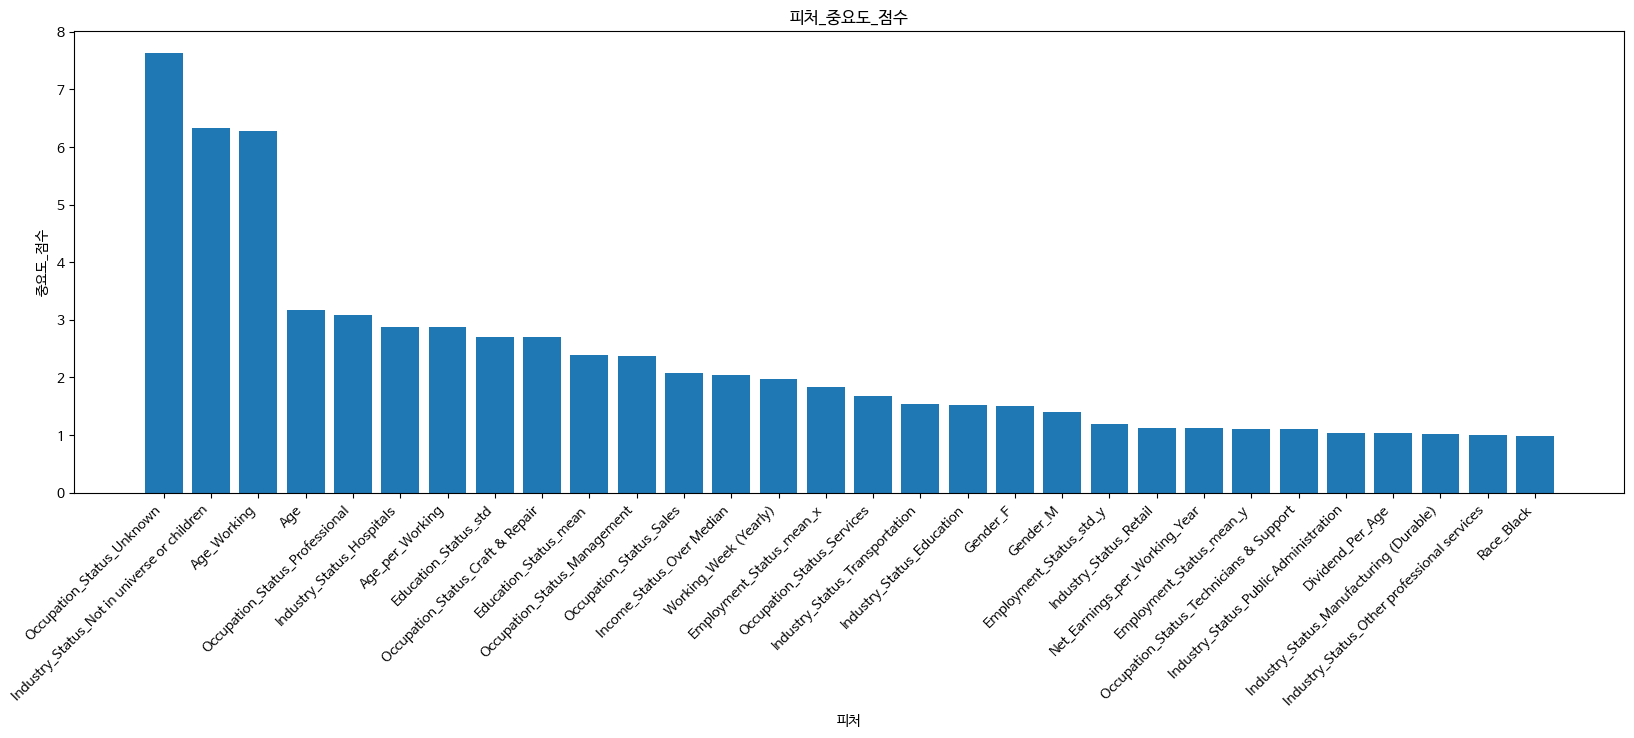

In [ ]:
# 특성 중요도를 기준으로 정렬된 인덱스 가져오기
sorted_indices = feature_importance.argsort()[::-1][:30]

# 정렬된 인덱스를 사용하여 선택된 특성 추출
selected_features = train_ft.columns[sorted_indices]

# 특성 중요도 시각화
plt.figure(figsize=(20, 6))
plt.bar(range(len(selected_features)), feature_importance[sorted_indices], tick_label=selected_features)
plt.title('피처_중요도_점수')
plt.xlabel('피처')
plt.ylabel('중요도_점수')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Net_Profit',
       'Total_Amount', 'Dividend_Yield', 'Gains_Ratio', 'Net_Gain',
       'Profit_Margin', 'Losses_Ratio', 'Net_Profit_per_Gain',
       'Net_Profit_per_Loss', 'Net_Earnings_per_Working_Year', 'Age_Working'],
      dtype='object')

# 차원 축소 진행

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary',
       'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status','Income_Status']
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train[cols])

sparse_train = pd.DataFrame(
    enc.transform(train[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
sparse_train.shape

sparse_test = pd.DataFrame(
    enc.transform(test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
sparse_test.shape

(10000, 270)

In [ ]:
from sklearn.decomposition import PCA
decomp = PCA(100,random_state=38)
decomp.fit(sparse_train)

PCA(n_components=100, random_state=38)

In [ ]:
# 차원 축소된 데이터를 붙여준다.

tmp = decomp.transform(sparse_train)
tmp = pd.DataFrame(tmp).add_prefix("decomp_")
x_train = pd.concat([train, tmp], axis=1).drop(columns = cols)

tmp = decomp.transform(sparse_test)
tmp = pd.DataFrame(tmp).add_prefix("decomp_")
x_test = pd.concat([test, tmp], axis=1).drop(columns = cols)

x_train.shape, x_test.shape

((20000, 540), (10000, 539))

In [ ]:
x_train.drop(columns=['Income'],inplace = True)

x_train.drop(columns = ['ID'],inplace = True)
x_test.drop(columns = ['ID'],inplace = True)

In [ ]:
# RobustScaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

train_data = pd.DataFrame(train_scaled, columns = x_train.columns)
test_data = pd.DataFrame(test_scaled, columns = x_test.columns)

train_data.shape,test_data.shape

((20000, 538), (10000, 538))

In [ ]:
feature_names = train_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
train_data.columns = feature_names_cleaned

feature_names = test_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
test_data.columns = feature_names_cleaned

In [ ]:
cat = CatBoostRegressor(random_state = 38)
scores = cross_val_score(cat, train_data, target, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
sqrt(-scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


601.5513265692227

# 간단한 EDA

In [ ]:
# 배당금이 0인 사람의 이득
# 배당금을 받은 사람의 경우에는 주식 투자를 했다고 생각할 수 있음.
# 배당금 자체가 적거나 받지 못한 경우에는 투자액이 매우 작기 때문이라고 생각할 수 있음.
# 그렇지 않은 사람의 경우에는 주식 투자를 하지 않았다고 생각할 수 있음

train['Dividends_Classification'] = train['Dividends'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
train['Dividends_Classification'].value_counts()

Zero        17928
Non-Zero     2072
Name: Dividends_Classification, dtype: int64

In [ ]:
test['Dividends_Classification'] = test['Dividends'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Dividends_Classification'].value_counts()

Zero        8906
Non-Zero    1094
Name: Dividends_Classification, dtype: int64

In [ ]:
train['Gains_Classification'] = train['Gains'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
train['Gains_Classification'].value_counts()

Zero        19217
Non-Zero      783
Name: Gains_Classification, dtype: int64

In [ ]:
test['Gains_Classification'] = test['Gains'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Gains_Classification'].value_counts()

Zero        9589
Non-Zero     411
Name: Gains_Classification, dtype: int64

In [ ]:
train['Losses_Classification'] = train['Losses'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
train['Losses_Classification'].value_counts()

Zero        19568
Non-Zero      432
Name: Losses_Classification, dtype: int64

In [ ]:
test['Losses_Classification'] = test['Losses'].apply(lambda x: 'Non-Zero' if x != 0 else 'Zero')
test['Losses_Classification'].value_counts()

Zero        9801
Non-Zero     199
Name: Losses_Classification, dtype: int64

In [ ]:
filtered_data = train[(train['Dividends_Classification'] == 'Zero') &
                      (train['Gains_Classification'] == 'Zero')]

# Calculate the average income for the filtered data
average_income = filtered_data['Income'].mean()

print(average_income)

# 모든 요소가 0인 사람들의 평균 Income

525.6308012006465


In [ ]:
train['Dividiends_Gains_Losses'] = train.apply(lambda x: 1 if (x['Dividends_Classification'] != 'Zero' or
                                                  x['Gains_Classification'] != 'Zero' or
                                                  x['Losses_Classification'] != 'Zero') else 0, axis=1)

train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Net_Earnings_per_Working_Year,Age_Working,Profit_Per_Working_Week,Profit_Per_Age,Dividend_Per_Age,Net_Profit_Squared,Dividends_Classification,Gains_Classification,Losses_Classification,Dividiends_Gains_Losses
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,0.000000,252,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,0.000000,1924,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,65.596154,3016,65.596154,58.810345,0.0,11634921,Zero,Non-Zero,Zero,1
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,0.000000,2288,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,0.000000,1924,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0


In [ ]:
test['Dividiends_Gains_Losses'] = test.apply(lambda x: 1 if (x['Dividends_Classification'] != 'Zero' or
                                                  x['Gains_Classification'] != 'Zero' or
                                                  x['Losses_Classification'] != 'Zero') else 0, axis=1)

test.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Net_Earnings_per_Working_Year,Age_Working,Profit_Per_Working_Week,Profit_Per_Age,Dividend_Per_Age,Net_Profit_Squared,Dividends_Classification,Gains_Classification,Losses_Classification,Dividiends_Gains_Losses
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,0.0,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,0.0,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,0.0,936,0.0,0.0,0.0,0,Zero,Zero,Zero,0
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,0.0,1170,0.0,0.0,0.0,0,Zero,Zero,Zero,0
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,0.0,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0


In [ ]:
train['Working_Week_Distinction'] = train['Working_Week (Yearly)'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Age_Working,Profit_Per_Working_Week,Profit_Per_Age,Dividend_Per_Age,Net_Profit_Squared,Dividends_Classification,Gains_Classification,Losses_Classification,Dividiends_Gains_Losses,Working_Week_Distinction
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,252,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0,Non-Zero
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,1924,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0,Non-Zero
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,3016,65.596154,58.810345,0.0,11634921,Zero,Non-Zero,Zero,1,Non-Zero
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,2288,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0,Non-Zero
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,1924,0.000000,0.000000,0.0,0,Zero,Zero,Zero,0,Non-Zero


In [ ]:
test['Working_Week_Distinction'] = test['Working_Week (Yearly)'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

test.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Age_Working,Profit_Per_Working_Week,Profit_Per_Age,Dividend_Per_Age,Net_Profit_Squared,Dividends_Classification,Gains_Classification,Losses_Classification,Dividiends_Gains_Losses,Working_Week_Distinction
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0,Zero
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0,Zero
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,936,0.0,0.0,0.0,0,Zero,Zero,Zero,0,Non-Zero
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,1170,0.0,0.0,0.0,0,Zero,Zero,Zero,0,Non-Zero
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,0,NaN,0.0,0.0,0,Zero,Zero,Zero,0,Zero


In [ ]:
train.groupby('Working_Week_Distinction')['Income'].agg('mean')

Working_Week_Distinction
Non-Zero    713.558115
Zero         39.859534
Name: Income, dtype: float64

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Net_Profit',
       'Total_Amount', 'Dividend_Yield', 'Gains_Ratio', 'Net_Gain',
       'Profit_Margin', 'Losses_Ratio', 'Net_Profit_per_Gain',
       'Net_Profit_per_Loss', 'Net_Earnings_per_Working_Year', 'Age_Working',
       'Dividends_Classification', 'Gains_Classification',
       'Losses_Classification', 'Dividiends_Gains_Losses',
       'Working_Week_Distinction'],
      dtype='object')

In [ ]:
test.shape

(10000, 38)